### Priority Queues:PROPERTIES:



#### Agenda



1.  Motives
2.  Naive implementation
3.  Heaps
    -   Mechanics
    -   Implementation
    -   Run-time Analysis
4.  Heapsort



#### 1.  Motives



-   **priority queue** stores number (or items that have a value)
-   **add(item)** - insert item into the queue
-   **pop<sub>max</sub>()** - return and remove item with maximum value
-   **max()** - return item with maximum value



#### 1.  Naive implementation



In [1]:
class PriorityQueue:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)
        self.data = sorted(self.data)

    def max(self):
        return self.data[-1]

    def pop_max(self):
        m = self.data[-1]
        del self.data[-1]
        return m

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

# Out[1]:

In [1]:
pq = PriorityQueue()

# Out[2]:

In [1]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

# Out[3]:

In [1]:
pq

# Out[4]:
[9, 13, 34, 43, 44, 44, 56, 70, 84, 97]

In [1]:
while pq:
    print(pq.pop_max())

92
85
62
60
46
19
18
12
6
0

#### 1.  Heaps



##### Mechanics



-   see notes



##### Implementation



In [1]:
class Heap:
    def __init__(self):
        self.data = []

    @staticmethod
    def parent(n):
        return (n - 1) // 2

    @staticmethod
    def left_child(n):
        return 2 * n + 1

    @staticmethod
    def right_child(n):
        return 2 * n + 2

    def pos_exists(self, n):
        return n < len(self)

    def switch_node(self, parent, child):
        parentval = self.data[parent]
        childval = self.data[child]
        self.data[parent] = childval
        self.data[child] = parentval

    def trickle_down(self, n):
        lc = Heap.left_child(n)
        rc = Heap.right_child(n)
        curval = self.data[n]
        #print(f" pos={n}:{curval} with heap {self}")
        if self.pos_exists(lc):
            if self.pos_exists(rc):
                lcval = self.data[lc]
                rcval = self.data[rc]
                #print(f"node {n}:{curval} with left: {lc}:{lcval} and  right: {rc}:{rcval}")
                if lcval > curval or rcval > curval:
                    if lcval > rcval:
                        #print("switch with left")
                        self.switch_node(n, lc)
                        self.trickle_down(lc)
                    else:
                        #print("switch with right")
                        self.switch_node(n, rc)
                        self.trickle_down(rc)
            else:
                lcval = self.data[lc]
                #print(f"node {n}:{curval} with left: {lc}:{lcval}")
                if lcval > curval:
                    #print("switch with left")
                    self.switch_node(n, lc)
                    self.trickle_down(lc)

    def trickle_up(self, n):
        if n > 0:
            p = Heap.parent(n)
            pval = self.data[p]
            curval = self.data[n]
            if pval < curval:
                self.switch_node(p,n)
                self.trickle_up(p)

    def add(self, x):
        self.data.append(x)
        self.trickle_up(len(self.data) - 1)

    def max(self):
        self.data[0]

    def pop_max(self):
        m = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        if len(self.data) > 0:
            self.trickle_down(0)
        return m

    def check_heap(self, pos):
        v = self.data[pos]
        lc = Heap.left_child(pos)
        rc = Heap.right_child(pos)
        #print(f"check {pos} of {len(self)} -> [{lc},{rc}]")
        if self.pos_exists(lc):
            lv = self.data[lc]
            if v < lv:
                #print(f"left child is {lv} of node with {v}@{pos}")
                return False
            self.check_heap(lc)
        if self.pos_exists(rc):
            rv = self.data[rc]
            if v < rv:
                #print(f"right child is {rv} of node with {v}@{pos}")
                return False
            self.check_heap(rc)
        return True

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

# Out[316]:

In [1]:
import random
for _ in range(10):
    h = Heap()
    for _ in range(10):
        h.add(random.randrange(100))

In [1]:
h

# Out[318]:
[88, 72, 68, 63, 65, 40, 1, 31, 5, 45]

-   inserting all elements of a list and then popping all elements returns the elements in reverse order



In [1]:
h = Heap()
for _ in range(10):
    h.add(random.randrange(100))
while h:
    print(h.pop_max())

79
73
69
43
35
33
20
19
11
3

-   we can use this to sort a list:



In [1]:
h = Heap()
l = [4,2,7,16,254,43,34,23]
for i in l:
    h.add(i)
s = [None] * len(l)
for i in range(-1, -1 * len(l) - 1, -1):
    s[i] = h.pop_max()
s

# Out[320]:
[2, 4, 7, 16, 23, 34, 43, 254]

##### Run-time Analysis



-   **max** - `O(1)`
-   **add** - `O(log n)` (height of a full binary tree is `log(n)`)
-   **pop<sub>max</sub>** - `O(log n)` (height of a full binary tree is `log(n)`)



#### 1.  Heapsort



-   use a heap for sorting as discussed above



In [1]:
def heapsort(iterable):
    heap = Heap()
    for i in iterable:
        heap.add(i)
    s = [None] * len(heap)
    for i in range(-1, -1 * len(s) - 1, -1):
        s[i] = heap.pop_max()
    return s

# Out[16]:

In [1]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    try:
        while True:
            b = next(it)
            yield a,b
            a = b
    except:
        pass

lst = heapsort(random.random() for _ in range(1000))
print(all((a <= b) for a, b in pairs(lst)))

True

In [1]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                           'from __main__ import heapsort; '
                           'import random; '
                           'rlst = (random.random() for _ in range({}))'.format(n),
                           number=1000)

# Out[22]:

# Out[23]:

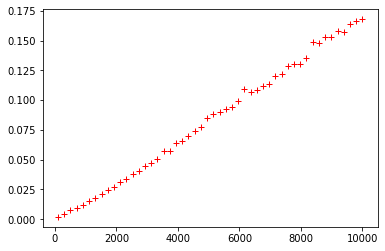

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

# Out[24]:

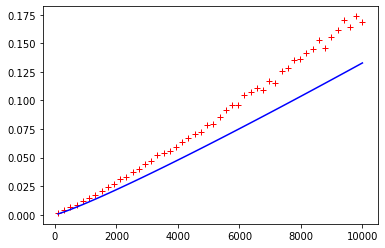

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()

##### heapsort in place



-   build the heap bottom up:
    -   the last element is a heap
    -   until the whole array is a heap:
        -   expand the heap by one element to the left
        -   this element is the new root and we use `trickle_down` (`sift_down`) to restore the heap property
    -   then until the heap is empty, remove the root of the heap (`pop_max`) at place it one element beyond the end of the current heap



In [1]:
def swap(lst,l,r):
    lst[l], lst[r] = lst[r], lst[l]

def heapsort_inplace(lst):
    heapify(lst)
    print(f"\nfinal heap: {lst}\n")
    for i in range(len(lst) -1, -1, -1):
        swap(lst,i,0)
        sift_down(lst,0,i-1)
        print(f"pop and insert at {i}: heap: {lst[0:i]} sorted suffix {lst[i:len(lst)]}")


def heapify(lst):
    for i in range(len(lst) -1,-1,-1):
        sift_down(lst,i,len(lst) - 1)
        print(f"heapified {i} to {len(lst) - 1}: {lst[0:i]} * {lst[i:len(lst)]}")

def sift_down(lst,start,end):
    root = start

    while Heap.left_child(root) <= end:
        child = Heap.left_child(root)
        swp = root

        if lst[swp] < lst[child]: # left child larger
            swp = child
        if child+1 <= end and lst[swp] < lst[child+1]: # right child larger than left or root
            swp = child + 1
        if root == swp:
            return
        swap(lst,root,swp)
        root = swp

:results:
   # Out[334]:
   :end:

In [1]:
l = [5,123,54,1,23,4,5123,99,123,432,555]
heapsort_inplace(l)
print(f"\nsorted results: {l}")

:results:
   heapified 10 to 10: [5, 123, 54, 1, 23, 4, 5123, 99, 123, 432] * [555]
   heapified 9 to 10: [5, 123, 54, 1, 23, 4, 5123, 99, 123] * [432, 555]
   heapified 8 to 10: [5, 123, 54, 1, 23, 4, 5123, 99] * [123, 432, 555]
   heapified 7 to 10: [5, 123, 54, 1, 23, 4, 5123] * [99, 123, 432, 555]
   heapified 6 to 10: [5, 123, 54, 1, 23, 4] * [5123, 99, 123, 432, 555]
   heapified 5 to 10: [5, 123, 54, 1, 23] * [4, 5123, 99, 123, 432, 555]
   heapified 4 to 10: [5, 123, 54, 1] * [555, 4, 5123, 99, 123, 432, 23]
   heapified 3 to 10: [5, 123, 54] * [123, 555, 4, 5123, 99, 1, 432, 23]
   heapified 2 to 10: [5, 123] * [5123, 123, 555, 4, 54, 99, 1, 432, 23]
   heapified 1 to 10: [5] * [555, 5123, 123, 432, 4, 54, 99, 1, 123, 23]
   heapified 0 to 10: [] * [5123, 555, 54, 123, 432, 4, 5, 99, 1, 123, 23]

   final heap: [5123, 555, 54, 123, 432, 4, 5, 99, 1, 123, 23]

   pop and insert at 10: heap: [555, 432, 54, 123, 123, 4, 5, 99, 1, 23] sorted suffix [5123]
   pop and insert at 9: h